143
cause
ขับรถเร็วเกินไป            1496
เปลี่ยนช่องทางกระทันหัน     647
สาเหตุจากสภาพรถ/ถนน         464
หลับใน                      158
ฝ่าฝืนสัญญาณ/ป้ายจราจร       48
ประมาท                       25
เบรคกระทันหัน                13
มึนเมา                       11
โรคประจำตัว                   9
ขับรถช้าลง                    8
Name: count, dtype: int64


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

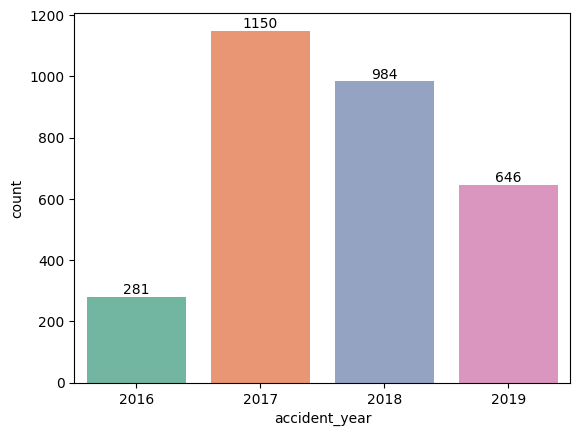

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

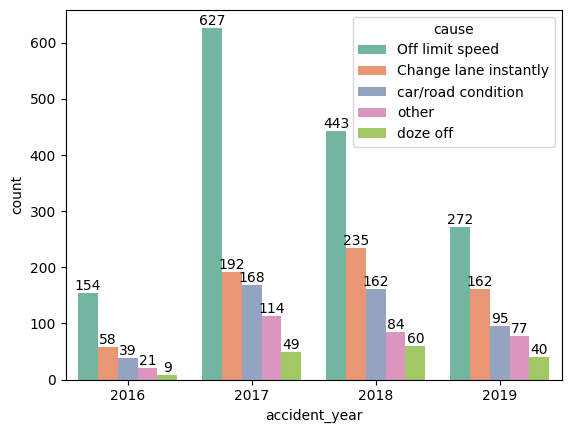

C:\Users\HP\AppData\Local\Temp\ipykernel_27532\1468679118.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  j=sns.countplot(y='cause',data=df_new,order=df_new['cause'].value_counts().index,palette='Set2')
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

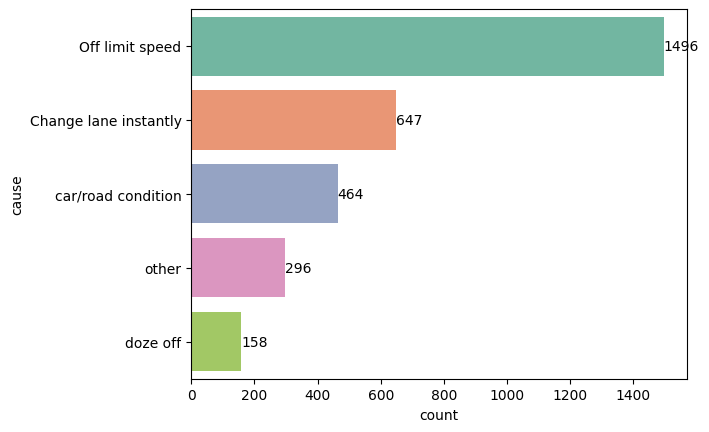

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

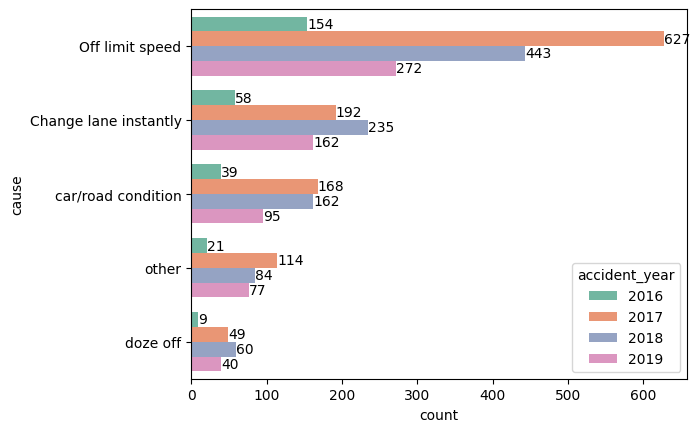

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


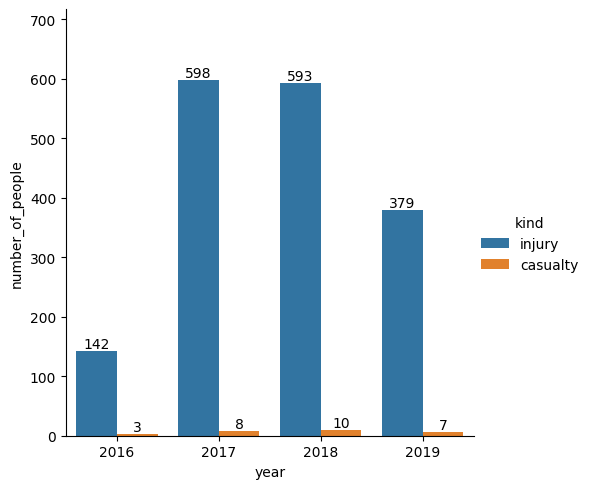

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#import data from year 60 61 62
df60=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python\thailand-motorway-accident\data\accident_2560.csv")

df61=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python\thailand-motorway-accident\data\accident_2561.csv")

df62=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python\thailand-motorway-accident\data\accident_2562.csv")
#merging 2560,2561,2562
frames=[df60,df61,df62]
df= pd.concat(frames)
#creating column with total injuries and casualties
df['total_injure']=df['injur_man']+df['injur_femel']
df['total_dead']=df['dead_man']+df['dead_femel']

#arrange by date
df = df.set_index('accident_date').sort_index()


#showing the number of unique causes
print(df['cause'].nunique())
print(df['cause'].value_counts(sort=True).head(10))

#mapping it from Thai to English as plotting in Thai cause a error configuration
df['weather_state']=df['weather_state'].map({'ปกติ':'normal','ฝนตก':'rain','ถนนเปียกลื่น':'rain','ฝนตกลมแรง':'rain'})

#subbing the data by including only the major reason
main_reason=['ขับรถเร็วเกินไป','เปลี่ยนช่องทางกระทันหัน','สาเหตุจากสภาพรถ/ถนน','หลับใน','ขับรถกระชั้นชิด']

df_main= df[df['cause'].isin(main_reason)]
df_other= df[~df['cause'].isin(main_reason)]

#mapping it from Thai to English as plotting in Thai cause a error configuration
df_main.loc[:,'cause'] = df_main['cause'].map({'ขับรถเร็วเกินไป': 'Off limit speed', 'เปลี่ยนช่องทางกระทันหัน': 'Change lane instantly','สาเหตุจากสภาพรถ/ถนน': 'car/road condition', 'หลับใน': 'doze off','ขับรถกระชั้นชิด': 'too close to front car'})
#change all the minor reason to 'other'
df_other.loc[:,('cause')] = df_other['cause'].map(lambda x: 'other'.format(x))

#merge them again
df_new=pd.concat([df_main,df_other])
#making arranged by the date
df_new.to_csv('df_new.csv')
df_new= pd.read_csv('df_new.csv',parse_dates=['accident_date'])
df_new.dtypes
#creating new columns year and month
df_new['accident_month']=df_new['accident_date'].dt.month
df_new['accident_year']=df_new['accident_date'].dt.year


#according to the COVID-19 pandemic,dataset of 2020 is unavaible
#showing the number of accidents occured in each year categorized by causes
h=sns.countplot(x='accident_year',data=df_new,palette='Set2',hue='accident_year', legend=False)
for container in h.containers:
    h.bar_label(container)
plt.show()

i=sns.countplot(x='accident_year',data=df_new,hue='cause',hue_order=df_new['cause'].value_counts().index,palette='Set2')
for container in i.containers:
    i.bar_label(container)
plt.show()
#showing the number of accidents occured in each causes categorized by year
j=sns.countplot(y='cause',data=df_new,order=df_new['cause'].value_counts().index,palette='Set2')
for container in j.containers:
    j.bar_label(container)
plt.show()
#categorizing them by year
f=sns.countplot(y='cause',data=df_new,order=df_new['cause'].value_counts().index,hue='accident_year',palette='Set2')
for container in f.containers:
    f.bar_label(container)
plt.show()

#concept that want to create a bar plot that telling informaton about injury and casualty in each years
#bringing data from old data to find the total of injury and casualty in each year

df2016=df_new[df_new['accident_year']==2016]
total_dead2016=df2016['total_dead'].sum()
total_injur2016=df2016['total_injure'].sum()

df2017=df_new[df_new['accident_year']==2017]
total_dead2017=df2017['total_dead'].sum()
total_injur2017=df2017['total_injure'].sum()


df2018=df_new[df_new['accident_year']==2018]
total_dead2018=df2018['total_dead'].sum()
total_injur2018=df2018['total_injure'].sum()


df2019=df_new[df_new['accident_year']==2019]
total_dead2019=df2019['total_dead'].sum()
total_injur2019=df2019['total_injure'].sum()




#creating new dataframe showing only year,total of injury and casualty
list_df_final = [
        {'year':'2016','kind':'injury','number_of_people':total_injur2016},
        {'year':'2016','kind':'casualty','number_of_people':total_dead2016},
        {'year':'2017','kind':'injury','number_of_people':total_injur2017},
        {'year':'2017','kind':'casualty','number_of_people':total_dead2017},
        {'year':'2018','kind':'injury','number_of_people':total_injur2018},
        {'year':'2018','kind':'casualty','number_of_people':total_dead2018},
        {'year':'2019','kind':'injury','number_of_people':total_injur2019},
        {'year':'2019','kind':'casualty','number_of_people':total_dead2019},
]     

df_final = pd.DataFrame(list_df_final)
#showing in bargraph
g = sns.catplot(x='year',y='number_of_people',data=df_final,kind='bar',hue='kind')
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

plt.show()